In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib as plt
from DataMacpy import *

DataMacpy Setup


In [2]:
df = pd.read_csv("train3.csv")
df.head(5)

,Dağıtılan Enerji (MWh),month,year,date,hour,o_clock,season,HourControl
0,1593.944216,1,2018,2018-01-01,00:00:00,0,Winter,Night
1,1513.933887,1,2018,2018-01-01,01:00:00,1,Winter,Night
2,1402.612637,1,2018,2018-01-01,02:00:00,2,Winter,Night
3,1278.527266,1,2018,2018-01-01,03:00:00,3,Winter,Night
4,1220.697701,1,2018,2018-01-01,04:00:00,4,Winter,Night


In [3]:
df.rename(columns ={'Dağıtılan Enerji (MWh)':'DE'}, inplace=True)

In [4]:
df.tail(5)

,DE,month,year,date,hour,o_clock,season,HourControl
40147,2492.489498,7,2022,2022-07-31,19:00:00,19,Summer,Night
40148,2479.958245,7,2022,2022-07-31,20:00:00,20,Summer,Night
40149,2485.016884,7,2022,2022-07-31,21:00:00,21,Summer,Night
40150,2396.574255,7,2022,2022-07-31,22:00:00,22,Summer,Night
40151,2285.252844,7,2022,2022-07-31,23:00:00,23,Summer,Night


In [5]:
y = df.DE

In [6]:
y

0        1593.944216
1        1513.933887
2        1402.612637
3        1278.527266
4        1220.697701
            ...     
40147    2492.489498
40148    2479.958245
40149    2485.016884
40150    2396.574255
40151    2285.252844
Name: DE, Length: 40152, dtype: float64

In [7]:
X = df.copy()
X.drop(["DE", "date", "hour"], axis=1, inplace=True)

In [8]:
X

,month,year,o_clock,season,HourControl
0,1,2018,0,Winter,Night
1,1,2018,1,Winter,Night
2,1,2018,2,Winter,Night
3,1,2018,3,Winter,Night
4,1,2018,4,Winter,Night
...,...,...,...,...,...
40147,7,2022,19,Summer,Night
40148,7,2022,20,Summer,Night
40149,7,2022,21,Summer,Night
40150,7,2022,22,Summer,Night


In [9]:
object_cols, d = calc_object_cols(X)

In [10]:
object_cols

['season', 'HourControl']

In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [12]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,month,year,o_clock,season,HourControl
0,1,2018,0,3.0,1.0
1,1,2018,1,3.0,1.0
2,1,2018,2,3.0,1.0
3,1,2018,3,3.0,1.0
4,1,2018,4,3.0,1.0
...,...,...,...,...,...
40147,7,2022,19,2.0,1.0
40148,7,2022,20,2.0,1.0
40149,7,2022,21,2.0,1.0
40150,7,2022,22,2.0,1.0


In [13]:
# X["season"].inverse_transform([[0,1,2,3]]) # bakılacak

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [16]:
X_train

,month,year,o_clock,season,HourControl
27039,1,2021,15,3.0,0.0
2485,4,2018,13,1.0,0.0
9857,2,2019,17,3.0,0.0
36056,2,2022,8,3.0,0.0
19522,3,2020,10,1.0,0.0
...,...,...,...,...,...
20757,5,2020,21,1.0,1.0
32103,8,2021,15,2.0,0.0
30403,6,2021,19,2.0,1.0
21243,6,2020,3,2.0,1.0


In [17]:
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

model2 = ExtraTreesRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_valid)
mean_absolute_percentage_error(y_valid, y_pred2)*100

7.419465931357161

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [20]:
y_pred = model.predict(X_valid)
y_pred

array([2194.10007823, 1703.14093942, 1702.28115719, ..., 1196.58118426,
       1380.49441698, 2367.58317051])

In [21]:
y_pred[:5]

array([2194.10007823, 1703.14093942, 1702.28115719, 2531.96040251,
       1661.81886959])

In [22]:
y_valid[:5]

28238    2047.054460
36096    1671.202000
22447    1845.658259
5389     2686.360736
15609    1303.162531
Name: DE, dtype: float64

In [23]:
mean_absolute_percentage_error(y_valid[:5], y_pred[:5])*100

10.026464037393282

In [24]:
mean_absolute_error(y_pred[:5], y_valid[:5])

167.08366636142514

In [25]:
mean_absolute_percentage_error(y_valid, y_pred)*100

7.4420830612458095

In [26]:
import eli5
from eli5.sklearn import PermutationImportance

# Make a small change to the code below to use in this problem. 
perm = PermutationImportance(model, random_state=1).fit(X_valid, y_valid)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
1.0306 ± 0.0095,o_clock
0.3483 ± 0.0309,season
0.1966 ± 0.0099,month
0.0737 ± 0.0045,year
0.0040 ± 0.0008,HourControl


In [27]:
# 1030 4 348

In [28]:
perm = PermutationImportance(model2, random_state=1).fit(X_valid, y_valid)

# uncomment the following line to visualize your results
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

Weight,Feature
0.9005 ± 0.0107,o_clock
0.2960 ± 0.0243,season
0.1891 ± 0.0073,month
0.1029 ± 0.0088,HourControl
0.0729 ± 0.0041,year


In [29]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,LSTM

In [33]:
dl_model = keras.Sequential([
    layers.BatchNormalization(input_shape=[5]),
    layers.Dense(units=512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(1)
])

dl_model.compile(optimizer='sgd', loss='mae', metrics=['mae'],)

history = dl_model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_valid, y_valid),)

Epoch 1/20
251/251 [==============================] - 7s 11ms/step - loss: 846.5925 - mae: 846.5925 - val_loss: 367.6655 - val_mae: 367.6655
Epoch 2/20
251/251 [==============================] - 2s 10ms/step - loss: 251.7458 - mae: 251.7458 - val_loss: 342.0745 - val_mae: 342.0745
Epoch 3/20
251/251 [==============================] - 2s 9ms/step - loss: 240.8901 - mae: 240.8901 - val_loss: 212.9642 - val_mae: 212.9642
Epoch 4/20
251/251 [==============================] - 2s 10ms/step - loss: 232.0721 - mae: 232.0721 - val_loss: 195.0014 - val_mae: 195.0014
Epoch 5/20
251/251 [==============================] - 2s 9ms/step - loss: 225.9200 - mae: 225.9200 - val_loss: 184.1013 - val_mae: 184.1013
Epoch 6/20
251/251 [==============================] - 2s 10ms/step - loss: 220.9882 - mae: 220.9882 - val_loss: 186.3684 - val_mae: 186.3684
Epoch 7/20
251/251 [==============================] - 2s 9ms/step - loss: 217.1641 - mae: 217.1641 - val_loss: 197.1320 - val_mae: 197.1320
Epoch 8/20
251/2

<AxesSubplot: >

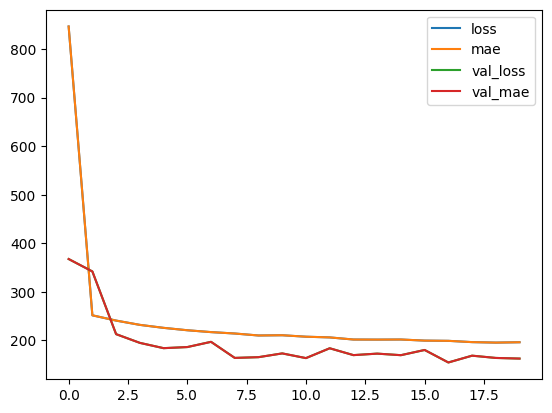

In [34]:
history_df = pd.DataFrame(history.history)
history_df.plot()

Minimum Validation Loss: 154.6205


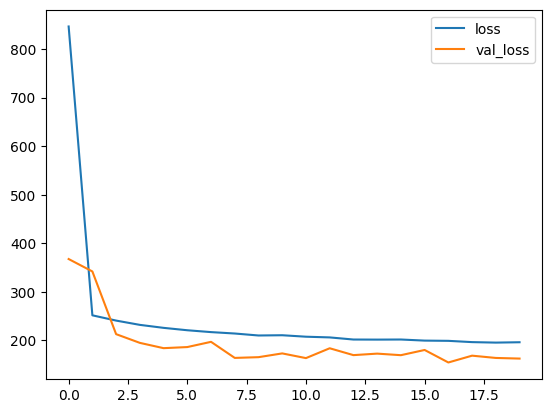

In [35]:
history_df2 = pd.DataFrame(history.history)
history_df2.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df2['val_loss'].min()))

In [36]:
y_pred3 = dl_model.predict(X_valid)
mean_absolute_percentage_error(y_valid, y_pred3)*100

251/251 [==============================] - 1s 2ms/step


8.706435365451586

In [37]:
y_pred3[:5]

array([[1766.9696],
       [1692.2789],
       [1665.1578],
       [2544.5679],
       [1698.0961]], dtype=float32)

In [38]:
y_valid[:5]

28238    2047.054460
36096    1671.202000
22447    1845.658259
5389     2686.360736
15609    1303.162531
Name: DE, dtype: float64

In [40]:
!pip install prophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=9128f82ca6484032155196976a2bcd1a39129ea11702663dd8c84ad795f1a63f
  Stored in directory: c:\users\ahmet\appdata\local\pip\cache\wheels\c2\3a\3d\11734e652782d3f823a08aae1c452e887eb16349750cca3f8a
Successfully built pymeeus


In [42]:
import pandas as pd
from prophet import Prophet

In [44]:
df = pd.read_csv('train.csv')
df.head()

,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [51]:
df.rename(columns ={'Dağıtılan Enerji (MWh)':'y', 'Tarih':'ds'}, inplace=True)

In [50]:
m = Prophet()
m.fit(df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()